In [13]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import netCDF4 as nc

In [14]:
# Read CSV data
data = pd.read_csv('usgs_earthquakes.csv')


In [15]:
# Sift through 2014 data
data['time'] = pd.to_datetime(data['time'])
data_2014 = data[data['time'].dt.year == 2014]


In [16]:
# Sort by magnitude and take the first 50 data
top_earthquakes = data_2014.sort_values(by='mag', ascending=False).head(50)

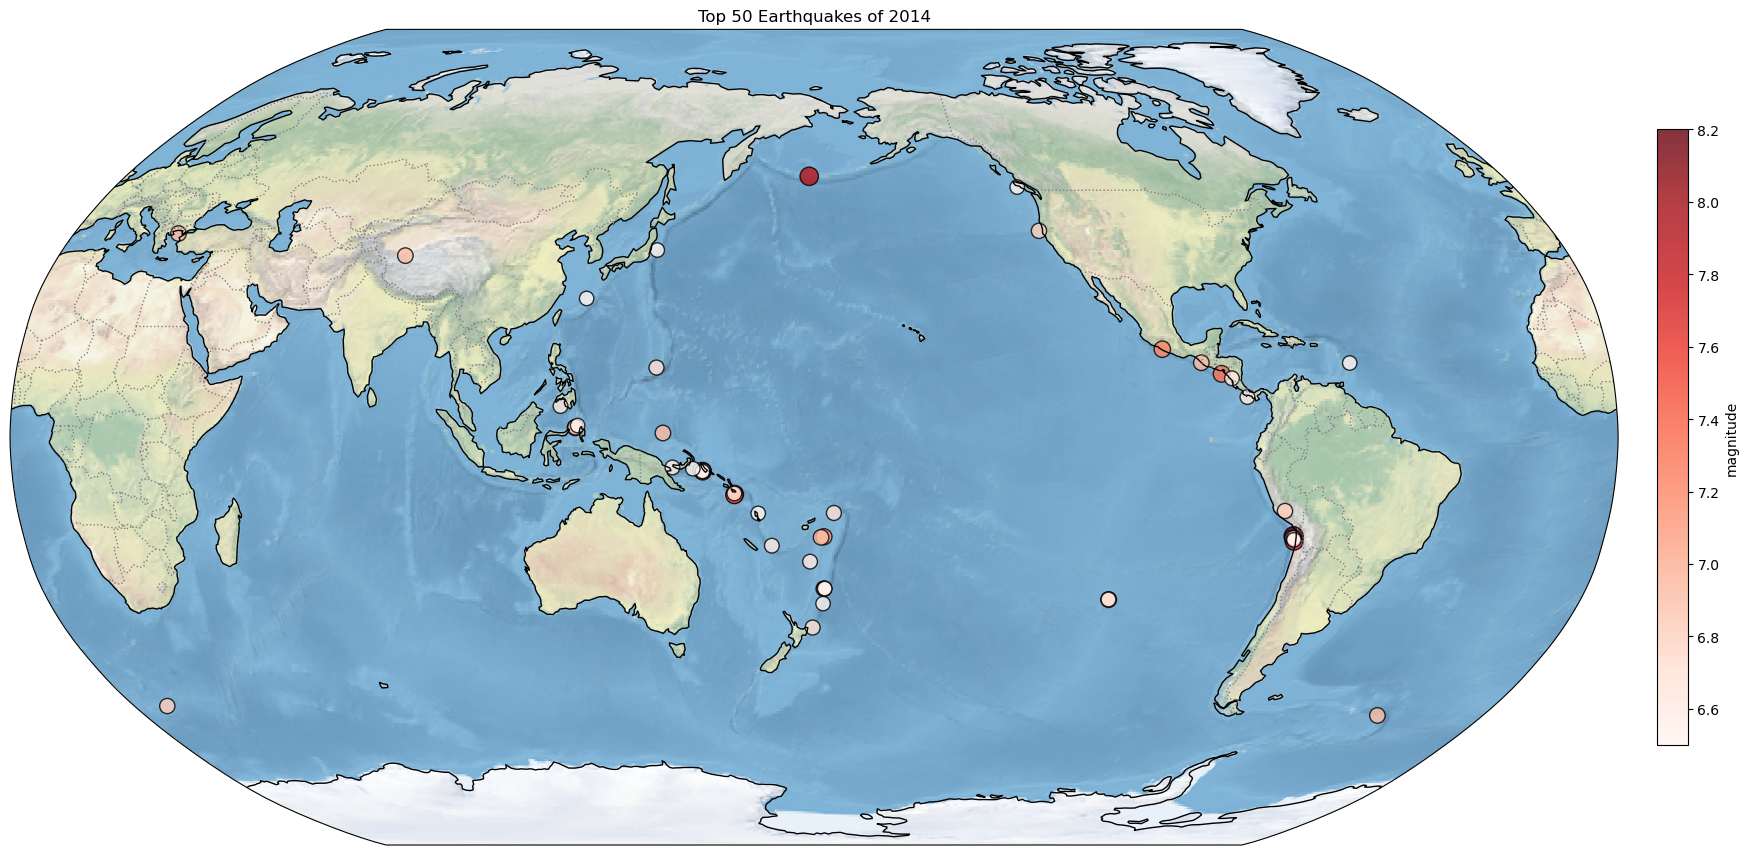

In [89]:
# Create a map
fig, ax = plt.subplots(figsize=(25, 20), subplot_kw={'projection': ccrs.Robinson(central_longitude=180)})
ax.set_global()

# Add coastlines, borders, and countries
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':', edgecolor='gray')

# Get longitude, latitude, and magnitude data
lons = top_earthquakes['longitude'].values
lats = top_earthquakes['latitude'].values
magnitudes = top_earthquakes['mag'].values

# Mark the earthquake points
sc = ax.scatter(lons, lats, c=magnitudes, cmap='Reds', s=magnitudes ** 2.5, alpha=0.8, edgecolors='k', linewidth=1,
                transform=ccrs.PlateCarree())

# Add color bar
cbar = plt.colorbar(sc, orientation='vertical', pad=0.02, aspect=20, shrink=0.4)
cbar.set_label('magnitude')

# Add title
plt.title('Top 50 Earthquakes of 2014')
ax.stock_img()  # Backdrop

# Plot
plt.show()

In [24]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np

In [68]:
# Read NetCDF data
data = xr.open_dataset('MERRA2_400.inst1_2d_asm_Nx.20231101.nc4'engine='netcdf4')
data


<xarray.Dataset>
Dimensions:  (lon: 576, lat: 361, time: 24)
Coordinates:
  * lon      (lon) float64 -180.0 -179.4 -178.8 -178.1 ... 178.1 178.8 179.4
  * lat      (lat) float64 -90.0 -89.5 -89.0 -88.5 -88.0 ... 88.5 89.0 89.5 90.0
  * time     (time) datetime64[ns] 2023-11-01 ... 2023-11-01T23:00:00
Data variables: (12/24)
    DISPH    (time, lat, lon) float32 ...
    PS       (time, lat, lon) float32 ...
    QV10M    (time, lat, lon) float32 ...
    QV2M     (time, lat, lon) float32 ...
    SLP      (time, lat, lon) float32 ...
    T10M     (time, lat, lon) float32 ...
    ...       ...
    U10M     (time, lat, lon) float32 ...
    U2M      (time, lat, lon) float32 ...
    U50M     (time, lat, lon) float32 ...
    V10M     (time, lat, lon) float32 ...
    V2M      (time, lat, lon) float32 ...
    V50M     (time, lat, lon) float32 ...
Attributes: (12/30)
    History:                           Original file generated: Sat Nov 11 20...
    Comment:                           GMAO filename: d5124_m2_jan10.inst1_2d...
    Filename:                          MERRA2_400.inst1_2d_asm_Nx.20231101.nc4
    Conventions:                       CF-1
    Institution:                       NASA Global Modeling and Assimilation ...
    References:                        http://gmao.gsfc.nasa.gov
    ...                                ...
    Contact:                           http://gmao.gsfc.nasa.gov
    identifier_product_doi:            10.5067/3Z173KIE2TPD
    RangeBeginningDate:                2023-11-01
    RangeBeginningTime:                00:00:00.000000
    RangeEndingDate:                   2023-11-01
    RangeEndingTime:                   23:00:00.000000

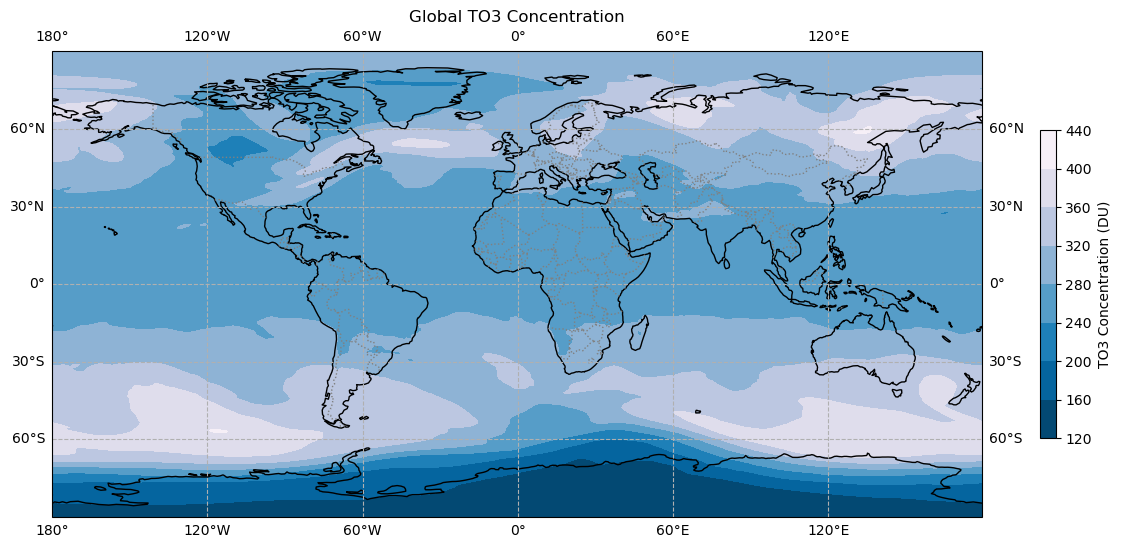

In [116]:
import cartopy.mpl.ticker as cticker
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)

# Get longitude, latitude, and TO3 concentration data
lons = data['lon'].values
lats = data['lat'].values
o3 = data['TO3'].values 
o3 = np.nanmean(o3,0)

# Create a 2d grid
lon_2d, lat_2d = np.meshgrid(lons, lats)

# Create map projection
fig, ax = plt.subplots(figsize=(15, 10), subplot_kw={'projection': ccrs.PlateCarree()})

# Add map features
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':', edgecolor='gray')

#  Add gridlines
gl = ax.gridlines(draw_labels=True, linestyle='--')

# Add x,y label and ticks  
gl.xlocator = cticker.LongitudeLocator()
gl.ylocator = cticker.LatitudeLocator()
gl.xformatter = cticker.LongitudeFormatter()
gl.yformatter = cticker.LatitudeFormatter()

# Plot TO3 concentration distribution
cmap = plt.get_cmap('PuBu_r')  
im = ax.contourf(lon_2d, lat_2d, o3, cmap=cmap, transform=ccrs.PlateCarree())

# Add color bar
cbar = plt.colorbar(im, orientation='vertical', pad=0.05, aspect=20, shrink=0.4, label='TO3 Concentration (DU)')

# Add title
plt.title('Global TO3 Concentration')

# Plot
plt.show()

In [108]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.mpl.ticker as cticker
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)


In [109]:
# Get the longitude and latitude index for the China region
china_lon_indices = np.where((lons >= 73.6) & (lons <= 135.0))[0]
china_lat_indices = np.where((lats >= 3.86) & (lats <= 53.55))[0]

# Get TO3 data for the China region using the index
o3_china = o3[china_lat_indices][:, china_lon_indices]

# Get longitude and latitude information for the China region
lons_china = lons[china_lon_indices]
lats_china = lats[china_lat_indices]

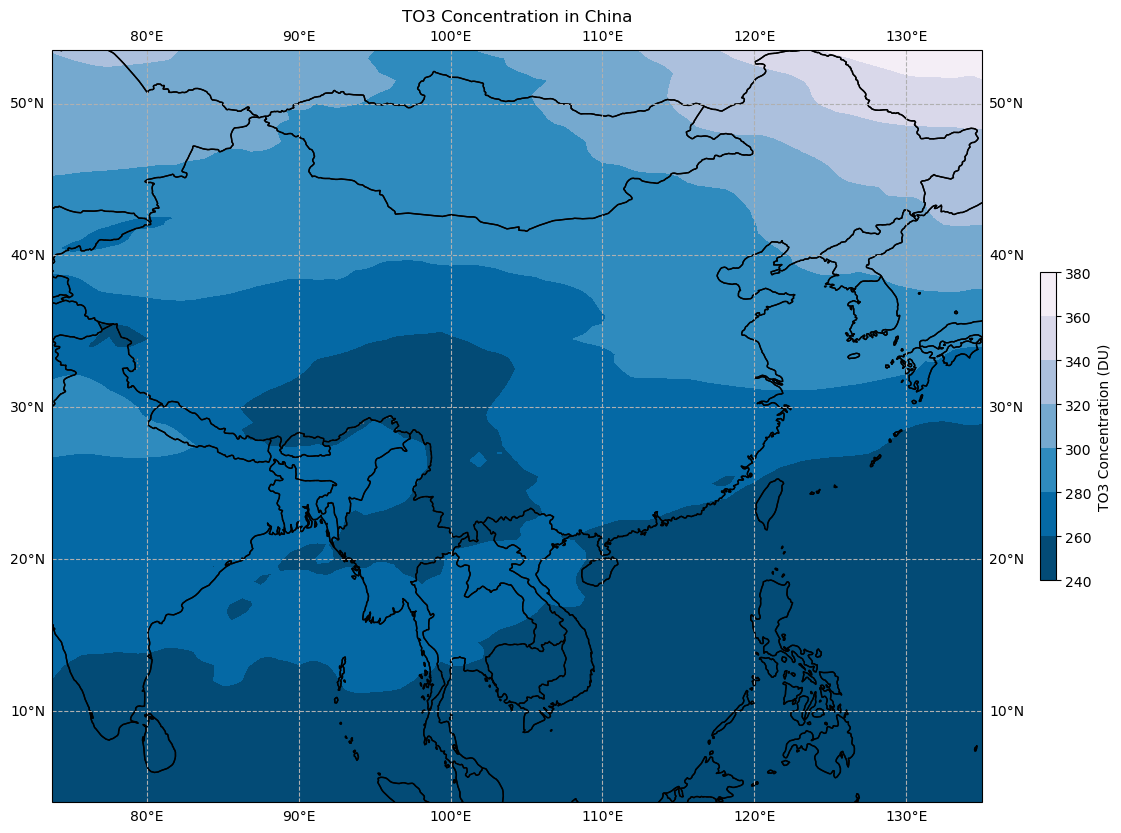

In [115]:
# Create a 2d grid
lon_2d_china, lat_2d_china = np.meshgrid(lons_china, lats_china)

# Create map projection
fig, ax = plt.subplots(figsize=(15, 10), subplot_kw={'projection': ccrs.PlateCarree()})

# Add map features
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':', edgecolor='gray')
countries = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_0_countries',
    scale='50m',
    facecolor='none',
    edgecolor='black'
)
ax.add_feature(countries)

# Add gridlines  
gl = ax.gridlines(draw_labels=True, linestyle='--')

# Add x,y label and ticks
gl.xlocator = cticker.LongitudeLocator()
gl.ylocator = cticker.LatitudeLocator()
gl.xformatter = cticker.LongitudeFormatter()
gl.yformatter = cticker.LatitudeFormatter()

# Plot TO3 concentration distribution in China 
cmap = plt.get_cmap('PuBu_r')  
im = ax.contourf(lon_2d_china, lat_2d_china, o3_china, cmap=cmap, transform=ccrs.PlateCarree())

# Add color bar
cbar = plt.colorbar(im, orientation='vertical', pad=0.05, aspect=20, shrink=0.4, label='TO3 Concentration (DU)')


# Add title
plt.title('TO3 Concentration in China')

# Plot
plt.show()
